In [2]:
import random
import matplotlib
import matplotlib.pyplot as plt
import time
%matplotlib inline

In [3]:
def rollDice():
    roll = random.randint(1,100)
    
    if roll==100:
        return False
    elif roll <= 50:
        return False
    elif 100 > roll >=50:
        return True
    



In [28]:
def doubler_bettor(funds, initial_wager,wager_count,color):
    global doubler_busts
    global doubler_profits
    
    value = funds
    wager = initial_wager
    wX = []
    vY = []
    currentWager = 1
    previousWager = 'win'
    previousWagerAmount = initial_wager
    
    while currentWager <= wager_count:
        if previousWager == 'win':
            if rollDice():
                value += wager
                wX.append(currentWager)
                vY.append(value)
            else:
                value -= wager
                previousWager = 'loss'
                previousWagerAmount = wager
                wX.append(currentWager)
                vY.append(value)
                if value < 0:
                    currentWager += 10000000000000
                    doubler_busts += 1
        elif previousWager == 'loss':
            if rollDice():
                wager = previousWagerAmount * 2
                if (value - wager) < 0:
                    wager = value
                    
                value += wager
                wager = initial_wager
                previousWager = 'win'
                wX.append(currentWager)
                vY.append(value)
            else:
                wager = previousWagerAmount * 2
                if(value - wager) < 0:
                    wager = value
                value -= wager
                previousWager = 'loss'
                previousWagerAmount = wager
                wX.append(currentWager)
                vY.append(value)
                
                if value <= 0:
                    currentWager += 10000000000000
                    doubler_busts += 1
        currentWager += 1
   
    plt.plot(wX,vY,color)
    
    if value>funds:
        doubler_profits += 1

In [29]:
def simple_bettor(funds,initial_wager,wager_count,color):
    global simple_busts
    #####################
    global simple_profits

    value = funds
    wager = initial_wager
    wX = []
    vY = []
    currentWager = 1
    while currentWager <= wager_count:
        if rollDice():
            value += wager
            wX.append(currentWager)
            vY.append(value)
        else:
            value -= wager
            wX.append(currentWager)
            vY.append(value)

            if value <= 0:
                currentWager += 10000000000000000
                simple_busts +=1
        currentWager += 1
    
    plt.plot(wX,vY,color)
    #####################
    if value > funds:
        simple_profits+=1


In [30]:
sampleSize = 100
startingFunds = 10000
wagerSize = 100
wagerCount = 100


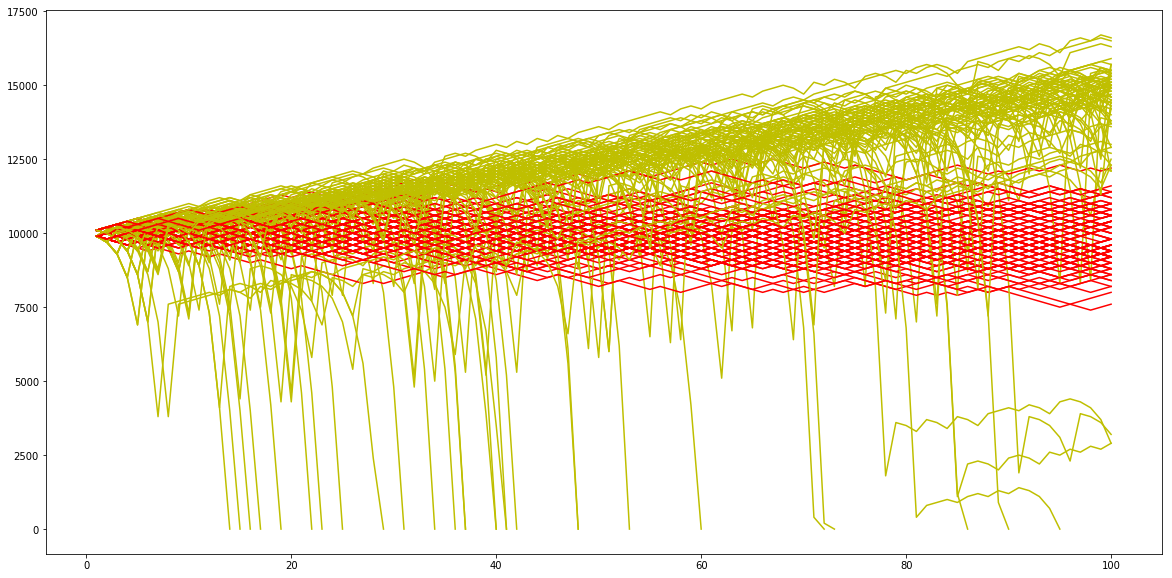

In [34]:
x = 0

simple_busts = 0.0
doubler_busts = 0.0

simple_profits = 0.0
doubler_profits = 0.0

while x < sampleSize:
    simple_bettor(startingFunds, wagerSize, wagerCount, 'r')
    doubler_bettor(startingFunds,wagerSize, wagerCount, 'y')
    x+=1

In [19]:
print(('Simple Bettor Bust Chances:', (simple_busts/sampleSize)*100.00))
print(('Doubler Bettor Bust Chances:', (doubler_busts/sampleSize)*100.00))

print (('Simple Bettor Profit Chances:', (simple_profits/sampleSize)*100.00))
print(('Doubler Bettor Profit Chances:', (doubler_profits/sampleSize)*100.00))
    

('Simple Bettor Bust Chances:', 0.0)
('Doubler Bettor Bust Chances:', 30.0)
('Simple Bettor Profit Chances:', 34.0)
('Doubler Bettor Profit Chances:', 63.0)


In [22]:
sampleSize = 10000
startingFunds = 10000
wagerSize = 100
wagerCount = 100


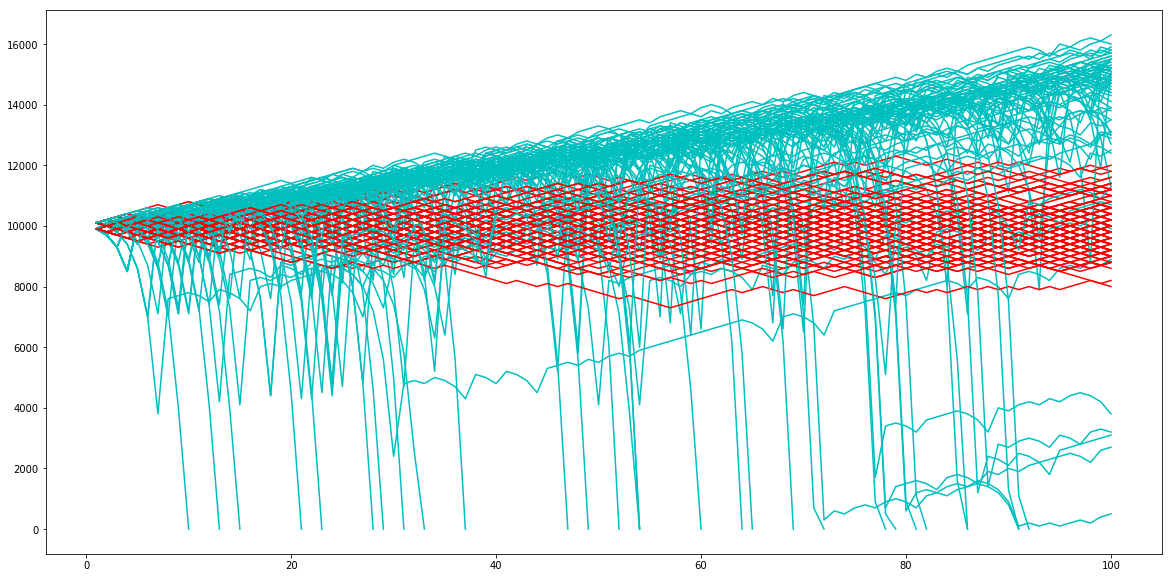

In [35]:
x = 0

simple_busts = 0.0
doubler_busts = 0.0

simple_profits = 0.0
doubler_profits = 0.0
plt.figure(figsize=(20,10))
while x < sampleSize:
    simple_bettor(startingFunds, wagerSize, wagerCount, 'r')
    doubler_bettor(startingFunds,wagerSize, wagerCount, 'c')
    x+=1

In [24]:
print(('Simple Bettor Bust Chances:', (simple_busts/sampleSize)*100.00))
print(('Doubler Bettor Bust Chances:', (doubler_busts/sampleSize)*100.00))

print (('Simple Bettor Profit Chances:', (simple_profits/sampleSize)*100.00))
print(('Doubler Bettor Profit Chances:', (doubler_profits/sampleSize)*100.00))

('Simple Bettor Bust Chances:', 0.0)
('Doubler Bettor Bust Chances:', 31.240000000000002)
('Simple Bettor Profit Chances:', 38.3)
('Doubler Bettor Profit Chances:', 62.980000000000004)


In [36]:
print(('Simple Bettor Bust Chances:', (simple_busts/sampleSize)*100.00))
print(('Doubler Bettor Bust Chances:', (doubler_busts/sampleSize)*100.00))

print (('Simple Bettor Profit Chances:', (simple_profits/sampleSize)*100.00))
print(('Doubler Bettor Profit Chances:', (doubler_profits/sampleSize)*100.00))

('Simple Bettor Bust Chances:', 0.0)
('Doubler Bettor Bust Chances:', 30.0)
('Simple Bettor Profit Chances:', 41.0)
('Doubler Bettor Profit Chances:', 63.0)


# Monte cArlo Simulation for n-multiple bettor solution

In [37]:
lower_bust = 31.235
higher_profit = 63.208

# back to 1,000
sampleSize = 1000
startingFunds = 10000
wagerSize = 100
wagerCount = 100

Multiple bettor function for monte carlo simulation

In [38]:
def multiple_bettor(funds,initial_wager,wager_count):#,color):

    #add
    global multiple_busts
    global multiple_profits
    
    value = funds
    wager = initial_wager
    wX = []
    vY = []
    currentWager = 1
    previousWager = 'win'
    previousWagerAmount = initial_wager

    while currentWager <= wager_count:
        if previousWager == 'win':
            if rollDice():
                value += wager
                wX.append(currentWager)
                vY.append(value)
            else:
                value -= wager 
                previousWager = 'loss'
                previousWagerAmount = wager
                wX.append(currentWager)
                vY.append(value)
                if value <= 0:
                    multiple_busts += 1
                    break
        elif previousWager == 'loss':
            if rollDice():

                #### must change the multiple ####
                wager = previousWagerAmount * random_multiple
                if (value - wager) <= 0:
                    wager = value
                    
                value += wager
                wager = initial_wager
                previousWager = 'win'
                wX.append(currentWager)
                vY.append(value)
            else:
                wager = previousWagerAmount * random_multiple
                if (value - wager) <= 0:
                    wager = value
                value -= wager
                previousWager = 'loss'
                previousWagerAmount = wager
                wX.append(currentWager)
                vY.append(value)

                if value <= 0:
                    #change
                    multiple_busts += 1
                    break

        currentWager += 1

    #plt.plot(wX,vY)
    #####################
    if value > funds:
        #change
        multiple_profits+=1
    

# this is the monte carlo simulation

In [39]:
while x < 10000:
    
    ######## move this stuff in here for the maths.
    multiple_busts = 0.0
    multiple_profits = 0.0
    # now we're wanting to do 100 attempts to get a good sample #
    multipleSampSize = 100000
    currentSample = 1
    
    random_multiple = random.uniform(0.1,10.0)
    #random_multiple = 2.00
    #print((random_multiple
    # adding this....
    while currentSample <= multipleSampSize:
        multiple_bettor(startingFunds,wagerSize,wagerCount)
        #add one to sample
        currentSample += 1

    if ((multiple_busts/multipleSampSize)*100.00 < lower_bust) and ((multiple_profits/multipleSampSize)*100.00 > higher_profit):
        print(('#################################################'))
        print(('found a winner, the multiple was:',random_multiple))
        print(('Lower Bust Rate Than:',lower_bust))
        print(('Higher profit rate than:',higher_profit))
        print(('Bust Rate:',(multiple_busts/multipleSampSize)*100.00))
        print(('Profit Rate:',(multiple_profits/multipleSampSize)*100.00))
        print(('#################################################'))
        time.sleep(5)
        #plt.show()
    else:
        pass
               

##        print(('####################################'))
##        print(('To beat:'))
##        print(('Lower Bust Rate Than:',lower_bust))
##        print(('Higher profit rate than:',higher_profit))
##        print(('Bust Rate:',(multiple_busts/multipleSampSize)*100.00))
##        print(('Profit Rate:',(multiple_profits/multipleSampSize)*100.00))
##        print(('####################################'))
##
##        #clears the figure
##        plt.clf()
        

    x+=1


#################################################
('found a winner, the multiple was:', 1.8895185155244816)
('Lower Bust Rate Than:', 31.235)
('Higher profit rate than:', 63.208)
('Bust Rate:', 23.625)
('Profit Rate:', 64.35300000000001)
#################################################
#################################################
('found a winner, the multiple was:', 1.638701756746776)
('Lower Bust Rate Than:', 31.235)
('Higher profit rate than:', 63.208)
('Bust Rate:', 11.181000000000001)
('Profit Rate:', 65.913)
#################################################
#################################################
('found a winner, the multiple was:', 1.6100750549272917)
('Lower Bust Rate Than:', 31.235)
('Higher profit rate than:', 63.208)
('Bust Rate:', 10.191)
('Profit Rate:', 64.401)
#################################################
#################################################
('found a winner, the multiple was:', 1.5955344036464647)
('Lower Bust Rate Than:', 31.235)
('Hig

#################################################
('found a winner, the multiple was:', 1.9372868642321102)
('Lower Bust Rate Than:', 31.235)
('Higher profit rate than:', 63.208)
('Bust Rate:', 27.171)
('Profit Rate:', 64.278)
#################################################
#################################################
('found a winner, the multiple was:', 1.9085174892717365)
('Lower Bust Rate Than:', 31.235)
('Higher profit rate than:', 63.208)
('Bust Rate:', 24.767)
('Profit Rate:', 64.395)
#################################################
#################################################
('found a winner, the multiple was:', 1.696662715506886)
('Lower Bust Rate Than:', 31.235)
('Higher profit rate than:', 63.208)
('Bust Rate:', 13.758999999999999)
('Profit Rate:', 69.894)
#################################################
#################################################
('found a winner, the multiple was:', 1.724225567278692)
('Lower Bust Rate Than:', 31.235)
('Higher profit r

#################################################
('found a winner, the multiple was:', 1.8912535033192375)
('Lower Bust Rate Than:', 31.235)
('Higher profit rate than:', 63.208)
('Bust Rate:', 23.571)
('Profit Rate:', 64.589)
#################################################
#################################################
('found a winner, the multiple was:', 1.8411674606127102)
('Lower Bust Rate Than:', 31.235)
('Higher profit rate than:', 63.208)
('Bust Rate:', 21.273)
('Profit Rate:', 65.323)
#################################################
#################################################
('found a winner, the multiple was:', 1.8951071803862665)
('Lower Bust Rate Than:', 31.235)
('Higher profit rate than:', 63.208)
('Bust Rate:', 23.812)
('Profit Rate:', 64.428)
#################################################
#################################################
('found a winner, the multiple was:', 1.7335120606129837)
('Lower Bust Rate Than:', 31.235)
('Higher profit rate than:'

#################################################
('found a winner, the multiple was:', 1.701881244919566)
('Lower Bust Rate Than:', 31.235)
('Higher profit rate than:', 63.208)
('Bust Rate:', 14.176)
('Profit Rate:', 70.352)
#################################################
#################################################
('found a winner, the multiple was:', 1.7686554761115518)
('Lower Bust Rate Than:', 31.235)
('Higher profit rate than:', 63.208)
('Bust Rate:', 18.877)
('Profit Rate:', 69.601)
#################################################
#################################################
('found a winner, the multiple was:', 1.8756245112206187)
('Lower Bust Rate Than:', 31.235)
('Higher profit rate than:', 63.208)
('Bust Rate:', 22.746)
('Profit Rate:', 64.62)
#################################################
#################################################
('found a winner, the multiple was:', 1.8672278189326408)
('Lower Bust Rate Than:', 31.235)
('Higher profit rate than:', 

#################################################
('found a winner, the multiple was:', 1.8533695244224921)
('Lower Bust Rate Than:', 31.235)
('Higher profit rate than:', 63.208)
('Bust Rate:', 22.144)
('Profit Rate:', 64.526)
#################################################
#################################################
('found a winner, the multiple was:', 1.8561187087984456)
('Lower Bust Rate Than:', 31.235)
('Higher profit rate than:', 63.208)
('Bust Rate:', 22.042)
('Profit Rate:', 64.771)
#################################################
#################################################
('found a winner, the multiple was:', 1.9772335768033733)
('Lower Bust Rate Than:', 31.235)
('Higher profit rate than:', 63.208)
('Bust Rate:', 29.986)
('Profit Rate:', 63.608)
#################################################
#################################################
('found a winner, the multiple was:', 1.690732926941465)
('Lower Bust Rate Than:', 31.235)
('Higher profit rate than:',

#################################################
('found a winner, the multiple was:', 1.8962509828964826)
('Lower Bust Rate Than:', 31.235)
('Higher profit rate than:', 63.208)
('Bust Rate:', 23.948)
('Profit Rate:', 64.249)
#################################################
#################################################
('found a winner, the multiple was:', 1.7577125718041666)
('Lower Bust Rate Than:', 31.235)
('Higher profit rate than:', 63.208)
('Bust Rate:', 18.365000000000002)
('Profit Rate:', 69.92)
#################################################
#################################################
('found a winner, the multiple was:', 1.8008232121693728)
('Lower Bust Rate Than:', 31.235)
('Higher profit rate than:', 63.208)
('Bust Rate:', 20.256)
('Profit Rate:', 67.183)
#################################################
#################################################
('found a winner, the multiple was:', 1.7402433558353052)
('Lower Bust Rate Than:', 31.235)
('Higher profit 

#################################################
('found a winner, the multiple was:', 1.9275855750545103)
('Lower Bust Rate Than:', 31.235)
('Higher profit rate than:', 63.208)
('Bust Rate:', 26.369)
('Profit Rate:', 64.39)
#################################################
#################################################
('found a winner, the multiple was:', 1.6848240358657876)
('Lower Bust Rate Than:', 31.235)
('Higher profit rate than:', 63.208)
('Bust Rate:', 13.113)
('Profit Rate:', 68.826)
#################################################
#################################################
('found a winner, the multiple was:', 1.8516376602973692)
('Lower Bust Rate Than:', 31.235)
('Higher profit rate than:', 63.208)
('Bust Rate:', 21.881)
('Profit Rate:', 64.938)
#################################################
#################################################
('found a winner, the multiple was:', 1.831504695410772)
('Lower Bust Rate Than:', 31.235)
('Higher profit rate than:', 

KeyboardInterrupt: 

# D'Alembert Strategy

In [9]:
def dAlembert(funds,initial_wager,wager_count):#,color):
    global ROI
    global da_busts
    global da_profits
    
    value = funds
    wager = initial_wager
    wX = []
    vY = []
    currentWager = 1
    previousWager = 'win'
    previousWagerAmount = initial_wager

    while currentWager <= wager_count:
        if previousWager == 'win':
            if wager == initial_wager:
                pass
            else:
                wager -= initial_wager

            #print 'current wager:',wager,'value:',value


            if rollDice():
                value += wager
                #print 'we won! Current Value:',value
                wX.append(currentWager)
                vY.append(value)
            else:
                value -= wager 
                previousWager = 'loss'
                #print 'we lost, current value',value
                previousWagerAmount = wager
                wX.append(currentWager)
                vY.append(value)
                if value <= 0:
                    da_busts += 1
                    break
        elif previousWager == 'loss':
            wager = previousWagerAmount + initial_wager
            if (value - wager) <= 0:
                wager = value
            #print 'Lost the last wager, current wager:',wager,'value:',value
            
            if rollDice(): 
                value += wager
                #print 'we won! Current Value:',value
                previousWager = 'win'
                wX.append(currentWager)
                vY.append(value)
            else:
                value -= wager
                previousWager = 'loss'
                #print 'we lost, current value',value
                previousWagerAmount = wager
                wX.append(currentWager)
                vY.append(value)

                if value <= 0:
                    da_busts += 1
                    break

        currentWager += 1

    #plt.plot(wX,vY)

    if value > funds:
        da_profits+=1
        
    ROI+=value

In [ ]:
while x < 1:
    
    da_busts = 0.0
    da_profits = 0.0
    daSampSize = 5000
    currentSample = 1
    
    #random_multiple = random.uniform(0.6,2.0)
    while currentSample <= daSampSize:
        dAlembert(startingFunds,wagerSize,wagerCount)
        currentSample += 1

    if ((da_busts/daSampSize)*100.00 < lower_bust) and ((da_profits/daSampSize)*100.00 > higher_profit):
        print '#################################################'
        #print 'found a winner, the multiple was:',random_multiple
        print 'Lower Bust Rate Than:',lower_bust
        print 'Higher profit rate than:',higher_profit
        print 'Bust Rate:',(da_busts/daSampSize)*100.00
        print 'Profit Rate:',(da_profits/daSampSize)*100.00
        print '#################################################'
        time.sleep(5)
        #plt.show()
    else:

        print '####################################'
        print 'To beat:'
        print 'Lower Bust Rate Than:',lower_bust
        print 'Higher profit rate than:',higher_profit
        print 'Bust Rate:',(da_busts/daSampSize)*100.00
        print 'Profit Rate:',(da_profits/daSampSize)*100.00
        print '####################################'

        #clears the figure
        #plt.clf()
        

    x+=1

## Starting with 50-50 odds and Calculating ROI for strategies

In [2]:
# back to 1,000
sampleSize = 1000
startingFunds = 100000
wagerSize = 100
wagerCount = 100


In [4]:
def rollDice():
    roll = random.randint(1,100)
    
    if roll<=50:
        return False
    elif roll>=51:
        return True

In [6]:
def multiple_bettor2(funds,initial_wager,wager_count,multiple):
    global ROI
    global multiple_busts
    global multiple_profits
    
    value = funds
    wager = initial_wager
    wX = []
    vY = []
    currentWager = 1
    previousWager = 'win'
    previousWagerAmount = initial_wager
    
    while currentWager <= wager_count:
        if previousWager == 'win':
            if rollDice():
                value += wager
                wX.append(currentWager)
                vY.append(value)
            else:
                value -= wager 
                previousWager = 'loss'
                previousWagerAmount = wager
                wX.append(currentWager)
                vY.append(value)
                if value <= 0:
                    multiple_busts += 1
                    break
        elif previousWager == 'loss':
            if rollDice():
                wager = previousWagerAmount * multiple
                if (value - wager) <= 0:
                    wager = value
                    
                value += wager
                wager = initial_wager
                previousWager = 'win'
                wX.append(currentWager)
                vY.append(value)
            else:
                wager = previousWagerAmount * multiple
                if (value - wager) <= 0:
                    wager = value
                value -= wager
                previousWager = 'loss'
                previousWagerAmount = wager
                wX.append(currentWager)
                vY.append(value)

                if value <= 0:
                    multiple_busts += 1
                    break

    
        currentWager += 1
    #print 'ending Value:',value 
    ROI += value

    #plt.plot(wX,vY)

    if value > funds:
        multiple_profits+=1  

In [7]:
multipleSampSize = 1000000
multiple_busts = 0.0
multiple_profits = 0.0

ROI = 0

counter = 1
while counter <= multipleSampSize:
    multiple_bettor2(startingFunds,wagerSize,wagerCount,1.75)
    counter +=1

print('Total Amount Invested:', multipleSampSize * startingFunds)
print('Total Return',ROI)
print('Difference:',ROI - (multipleSampSize * startingFunds))
print('Bust Rate:',(multiple_busts/multipleSampSize)*100.00)
print('Profit Rate:',(multiple_profits/multipleSampSize))

Total Amount Invested: 100000000000
Total Return 100002857504.61475
Difference: 2857504.6147460938
Bust Rate: 1.0978999999999999
Profit Rate: 0.797522


## Variable wagersize and wagercount monte carlo

In [12]:
#using the same function written for dalembert above 
# just add something to calculate the return in the old function

sampleSize = 1000
startingFunds = 1000000

while True:
    wagerSize = random.uniform(1.0,1000.0)
    wagerCount = random.uniform(10.0,10000.00)

    Ret = 0.0
    da_profits = 0.0
    da_busts = 0.0
    daSampSize=10000

    counter = 1
    ROI = 0.0
    while counter <= daSampSize:
        dAlembert(startingFunds, wagerSize, wagerCount)
        counter+=1
    
#     ROI = Ret - (daSampSize*startingFunds)
    totalInvested = daSampSize*startingFunds
    
    percentROI = (ROI/totalInvested)*100.00
    
    wagerSizePercent = (wagerSize/startingFunds)*100.00
    print('############################################')
    print('total invested: ',daSampSize*startingFunds)
#     print('total Return: ', Ret)
    print('ROI',ROI)
    print('Bust Rates: ',(da_busts/daSampSize)*100.00)
    print('Profit Rates: ',(da_profits/daSampSize)*100.00)
    print('wager Size: ',wagerSize)
    print('wager count: ',wagerCount)
    print('Percent ROI: ',percentROI)

############################################
total invested:  10000000000
ROI 9993921843.931015
Bust Rates:  0.16999999999999998
Profit Rates:  69.88
wager Size:  849.0051659892455
wager count:  226.22572304614437
Percent ROI:  99.93921843931015
############################################
total invested:  10000000000
ROI 9862400774.684528
Bust Rates:  45.839999999999996
Profit Rates:  49.84
wager Size:  539.6000552826189
wager count:  4687.13013648976
Percent ROI:  98.6240077468453
############################################
total invested:  10000000000
ROI 10096424401.17206
Bust Rates:  53.169999999999995
Profit Rates:  44.04
wager Size:  867.2222110393681
wager count:  3927.220080286444
Percent ROI:  100.9642440117206
############################################
total invested:  10000000000
ROI 9955259041.804796
Bust Rates:  28.310000000000002
Profit Rates:  61.28
wager Size:  177.6110997596861
wager count:  7778.911450667931
Percent ROI:  99.55259041804796
########################

KeyboardInterrupt: 